In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [135]:
df = pd.read_excel("../data/Ch12_Q1_Data_File.xlsx")
df.head()

,y,x1,x2
0,0,11.39,9.10
1,0,9.79,12.27
2,0,11.50,11.42
3,1,9.74,8.53
4,0,10.48,12.89


In [136]:
X = df[["x1", "x2"]]
y = df["y"]

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.40, random_state=321)


In [139]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [140]:
param_grid = {'n_neighbors': range(1, 10 + 1)}

In [141]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(knn, 
                      param_grid, 
                      cv = 10, 
                      scoring = 'accuracy')

In [142]:
knn_fit = search.fit(X_train, y_train)
knn_fit.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [143]:
y_preds_ = knn_fit.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix, classification_report

In [145]:
y_preds_ = knn_fit.predict(X_test)
y_probas_ = knn_fit.predict_proba(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_).ravel()

sensitivity = tp / (tp + fn)  # Also called recall or TPR
specificity = tn / (tn + fp)  # Also called TNR
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Sensitivity: 0.5
Specificity: 1.0
Precision: 1.0
Accuracy: 0.7916666666666666


In [146]:
print(classification_report(y_test, y_preds_))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.50      0.67        10

    accuracy                           0.79        24
   macro avg       0.87      0.75      0.76        24
weighted avg       0.85      0.79      0.77        24



## Question 2

In [147]:
path = "../data/Ch12_Q8_Data_File.xlsx"
admit_data_df = pd.read_excel(path)
admit_data_df.head()

,Admit,GPA,SAT
0,1,3.1,1550
1,0,2.7,1360
2,1,2.6,1470
3,1,3.7,1450
4,1,3.1,1500


In [148]:
path = "../data/Ch12_Q8_Score_File.xlsx"
admit_score_df = pd.read_excel(path)
admit_score_df.head()

,GPA,SAT
0,3.00,1500
1,2.75,1290
2,3.10,1470
3,3.55,1480
4,3.10,1500


In [149]:
X = admit_data_df[["GPA", "SAT"]]
y = admit_data_df["Admit"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.40, random_state=321)

In [150]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 10 + 1)}

search = GridSearchCV(knn, 
                      param_grid, 
                      cv = 10, 
                      scoring = 'accuracy')
knn_fit = search.fit(X_train, y_train)
knn_fit.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [151]:
y_preds_ = knn_fit.predict(X_test)
y_probas_ = knn_fit.predict_proba(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_).ravel()

sensitivity = tp / (tp + fn)  # Also called recall or TPR
specificity = tn / (tn + fp)  # Also called TNR
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Sensitivity: 0.6875
Specificity: 0.875
Precision: 0.9166666666666666
Accuracy: 0.75


In [152]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probas_[:, 1])

np.float64(0.78125)

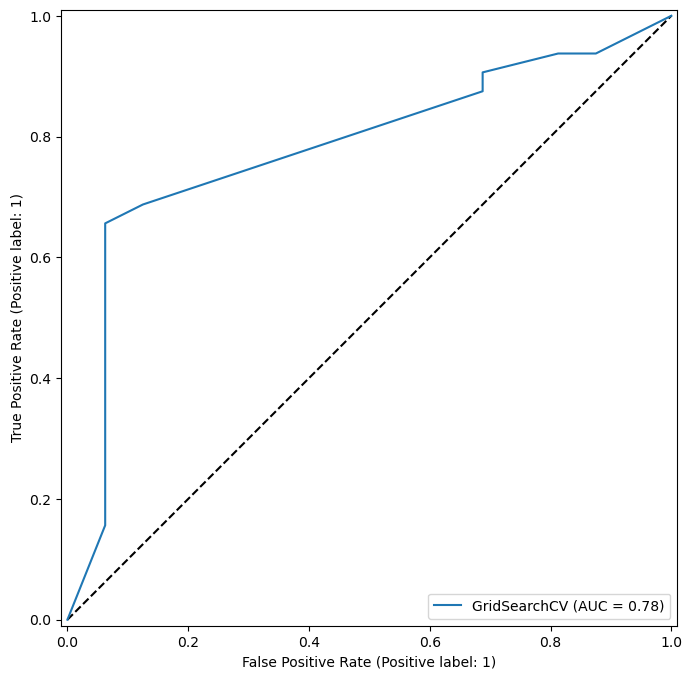

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
RocCurveDisplay.from_estimator(knn_fit, 
                               X = X_test, 
                               y = y_test, 
                               ax = ax)

In [154]:
knn_fit.predict(admit_score_df)

C:\Users\Austin Muelrath\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1])

## Question 3

In [155]:
path = "../data/Ch12_Q20_Data_File.xlsx"
data_df = pd.read_excel(path)

path = "../data/Ch12_Q20_Score_File.xlsx"
score_df = pd.read_excel(path)

In [156]:
data_df.head()

,y,x1,x2,x3
0,No,1,1,0
1,No,0,0,1
2,No,1,1,1
3,Yes,1,0,1
4,No,0,1,0


In [157]:
data_df["y"] = data_df["y"].apply(lambda x: 0 if x == "No" else 1)

In [158]:
X = data_df[["x1", "x2", "x3"]]
y = data_df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=321)

In [159]:
from sklearn.naive_bayes import CategoricalNB

nb_model = CategoricalNB()
param_grid = {'fit_prior': [True, False]}

search = GridSearchCV(nb_model, 
                      param_grid, 
                      cv = 10, 
                      scoring = 'accuracy')

nb_fit = search.fit(X_train, y_train)

In [160]:
y_preds_ = nb_fit.predict(X_test)
y_probas_ = nb_fit.predict_proba(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_).ravel()

sensitivity = tp / (tp + fn)  # Also called recall or TPR
specificity = tn / (tn + fp)  # Also called TNR
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Sensitivity: 0.8888888888888888
Specificity: 0.6470588235294118
Precision: 0.8
Accuracy: 0.7954545454545454


In [161]:
import numpy as np

outcomes_df = pd.DataFrame({
    "actual": y_test.astype('int'),
    "probas": nb_fit.predict_proba(X_test)[:, 1]
})

cuts = pd.qcut(outcomes_df.probas, q = 10, duplicates = 'drop')
lifts = (outcomes_df.groupby(cuts)['actual'].sum() / cuts.value_counts()) / np.mean(outcomes_df.actual)

plot_df = pd.DataFrame({
  'Lift': np.round(lifts, 3),
  'N': cuts.value_counts()
})

plot_df['Cumulative N'] = np.cumsum(np.flip(plot_df.N))
plot_df['Cumulative Percentile'] = round(plot_df['Cumulative N'] / len(outcomes_df) * 100, 0).astype('int')

<positron-console-cell-161>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [162]:
plot_df

,Lift,N,Cumulative N,Cumulative Percentile
probas,,,,
"(0.189, 0.205]",0.543,6,44,100
"(0.205, 0.26]",0.204,8,38,86
"(0.26, 0.593]",1.397,7,30,68
"(0.593, 0.616]",1.630,6,23,52
"(0.616, 0.686]",1.150,17,17,39


<Axes: xlabel='Cumulative Percentile', ylabel='Lift'>

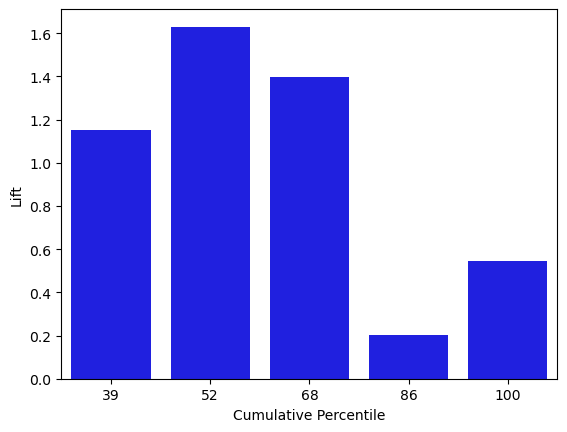

In [163]:
import seaborn as sns

sns.barplot(y = 'Lift', 
            x = 'Cumulative Percentile', 
            data = plot_df, 
            color = 'blue')

In [164]:

roc_auc_score(y_test, y_probas_[:, 1])

np.float64(0.7113289760348583)

In [165]:
nb_fit.predict(score_df)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

## Question 4

In [166]:
path = "../data/Ch12_Q35_Data_File.xlsx"
df = pd.read_excel(path)
df.head()

,Own,Children,Age,Income,Rental
0,0,1,41,64000,0
1,1,0,64,22000,0
2,1,1,38,189000,1
3,0,1,36,94000,0
4,0,1,79,150000,0


In [180]:
df["AgeBin"] = pd.cut(df["Age"], bins=[22, 45, 85], labels=[1,2], include_lowest=True)
df["IncomeBin"] = pd.cut(df["Income"], bins=[0, 85_000, 300_000], labels=[1,2], include_lowest=True)

df[["AgeBin", "IncomeBin"]].head(2)

,AgeBin,IncomeBin
0,1,1
1,2,1


In [176]:
df[["Age", "Income"]].head(2)

,Age,Income
0,41,64000
1,64,22000


In [181]:
X = df[["Own", "Children", "AgeBin", "IncomeBin"]]
y = df["Rental"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=321)

In [182]:
from sklearn.naive_bayes import CategoricalNB

nb_model = CategoricalNB()
param_grid = {'fit_prior': [True, False]}

search = GridSearchCV(nb_model, 
                      param_grid, 
                      cv = 10, 
                      scoring = 'accuracy')

nb_fit = search.fit(X_train, y_train)

In [187]:
y_preds_ = nb_fit.predict(X_test)
y_probas_ = nb_fit.predict_proba(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_).ravel()

sensitivity = tp / (tp + fn)  # Also called recall or TPR
specificity = tn / (tn + fp)  # Also called TNR
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Sensitivity: 0.42857142857142855
Specificity: 0.812206572769953
Precision: 0.5454545454545454
Accuracy: 0.68


In [184]:
import numpy as np

outcomes_df = pd.DataFrame({
    "actual": y_test.astype('int'),
    "probas": nb_fit.predict_proba(X_test)[:, 1]
})

cuts = pd.qcut(outcomes_df.probas, q = 10, duplicates = 'drop')
lifts = (outcomes_df.groupby(cuts)['actual'].sum() / cuts.value_counts()) / np.mean(outcomes_df.actual)

plot_df = pd.DataFrame({
  'Lift': np.round(lifts, 3),
  'N': cuts.value_counts()
})

plot_df['Cumulative N'] = np.cumsum(np.flip(plot_df.N))
plot_df['Cumulative Percentile'] = round(plot_df['Cumulative N'] / len(outcomes_df) * 100, 0).astype('int')

<positron-console-cell-184>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [188]:
plot_df

,Lift,N,Cumulative N,Cumulative Percentile
probas,,,,
"(0.102, 0.154]",0.298,39,325,100
"(0.154, 0.265]",0.484,60,286,88
"(0.265, 0.33]",0.528,33,226,70
"(0.33, 0.426]",1.171,57,193,59
"(0.426, 0.481]",1.339,13,136,42
"(0.481, 0.493]",1.244,35,123,38
"(0.493, 0.583]",1.527,38,88,27
"(0.583, 0.595]",1.625,50,50,15


<Axes: xlabel='Cumulative Percentile', ylabel='Lift'>

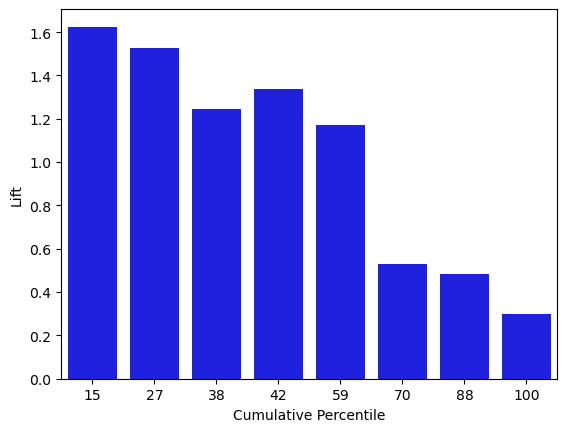

In [185]:
import seaborn as sns

sns.barplot(y = 'Lift', 
            x = 'Cumulative Percentile', 
            data = plot_df, 
            color = 'blue')

In [186]:

roc_auc_score(y_test, y_probas_[:, 1])

np.float64(0.7049379610999329)